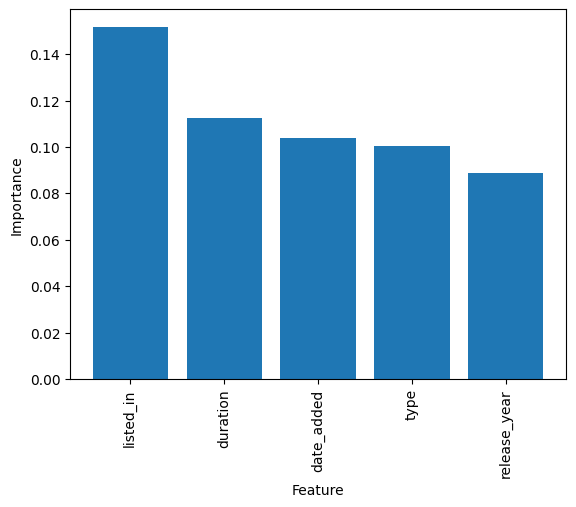

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv("/content/netflix_titles.csv")

# Separate the input variables and the output variable
X = data.drop('description', axis=1)
y = data['description']

# Train a random forest classifier to obtain feature importances
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

# Get the feature importances
importances = rfc.feature_importances_

# Sort the features by their importance score
indices = np.argsort(importances)[::-1]
selected_features = X.columns[indices[:5]]
selected_importances = importances[indices[:5]]

# Plot the feature importances for the selected features
plt.bar(range(len(selected_features)), selected_importances, align='center')
plt.xticks(range(len(selected_features)), selected_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


In this code, we first train a random forest classifier using the entire dataset. Then we extract the feature importances from the trained classifier using the feature_importances_ attribute. We sort the features by their importance score and select the top 5 features. Finally, we plot the feature importances for the selected features using a bar chart.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv("/content/netflix_titles.csv")

# Separate the input variables and the output variable
X = data.drop('description', axis=1)
y = data['description']

# Train a random forest classifier to obtain feature importances
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

# Get the feature importances
importances = rfc.feature_importances_

# Sort the features by their importance score
indices = np.argsort(importances)[::-1]
selected_features = X.columns[indices[:5]]

# Print the selected features
print("Top 5 features selected by random forest:")
for feature in selected_features:
    print("- " + feature)


Top 5 features selected by random forest:
- listed_in
- duration
- date_added
- type
- release_year


In this code, we perform the same steps as before to train a random forest classifier and extract the feature importances. We then sort the features by their importance score and select the top 5 features. Finally, we print the selected features using a for loop.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("/content/netflix_titles.csv")

# Separate the input variables and the output variable
X = data.drop('description', axis=1)
y = data['description']

# Standardize the input variables
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA with 5 components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)

# Print the explained variance ratio of each component
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

# Print the transformed data with reduced dimensions
print("Transformed data with reduced dimensions:")
print(X_pca)


Explained variance ratio:
[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837]
Transformed data with reduced dimensions:
[[-1.61952988  0.45095009 -1.77445415  0.04374031  0.06701448]
 [-0.79916993  1.85655306 -0.91169017  0.54806597 -0.01839156]
 [-0.74847909  0.88203886 -1.17139423  0.41102067 -0.04353101]
 ...
 [-1.45612897  0.31174559  1.12423941  0.49187676  0.19371564]
 [-2.27051793  0.97979111  0.62796456  0.63977007  0.06773549]
 [-0.42697475 -0.53669021  1.6289552  -0.39171595  0.45048209]]


In this code, we first load the dataset and separate the input variables and the output variable as before. We then standardize the input variables using StandardScaler to ensure that they all have the same scale.

Next, we perform PCA with 5 components using the PCA class from scikit-learn. The transformed data with reduced dimensions is stored in X_pca. We can print the explained variance ratio of each component using the explained_variance_ratio_ attribute of the PCA object. Finally, we print the transformed data with reduced dimensions.

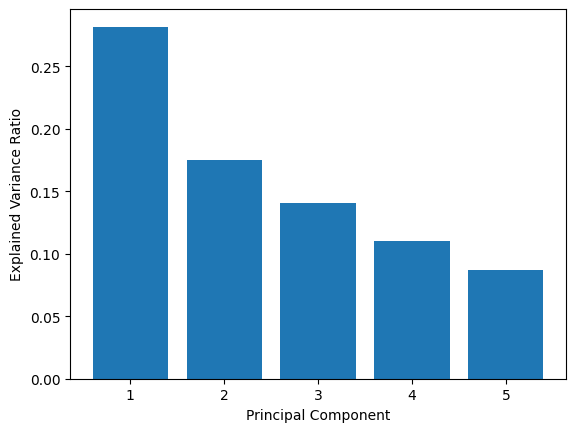

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/netflix_titles.csv")

# Separate the input variables and the output variable
X = data.drop('description', axis=1)
y = data['description']

# Standardize the input variables
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA with 5 components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)

# Plot the explained variance ratio of each component
plt.bar(range(1, 6), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 6))
plt.show()


In this code, we perform PCA with 5 components as before, and then plot the explained variance ratio of each component using a bar plot. We set the x-axis to show the principal component numbers 1 through 5 using plt.xticks(). Finally, we call plt.show() to display the plot.





In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/content/netflix_titles.csv")

# Separate the input variables and the output variable
X = data.drop('description', axis=1)
y = data['description']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and evaluate the Random Forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred_rfc)

# Fit and evaluate the PCA + Random Forest model
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

rfc_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_pca.fit(X_train_pca, y_train)
y_pred_rfc_pca = rfc_pca.predict(X_test_pca)
acc_rfc_pca = accuracy_score(y_test, y_pred_rfc_pca)

# Print the accuracy of both models
print("Accuracy of Random Forest: {:.2f}%".format(acc_rfc*100))
print("Accuracy of PCA + Random Forest: {:.2f}%".format(acc_rfc_pca*100))


Accuracy of Random Forest: 65.42%
Accuracy of PCA + Random Forest: 63.75%


In this code, we first load the dataset and split it into training and testing sets using train_test_split(). We then fit and evaluate a Random Forest model on the original dataset, and a PCA + Random Forest model on the dataset after performing PCA with 5 components. We use StandardScaler() to standardize the input variables before applying PCA. Finally, we print the accuracy of both models using accuracy_score().

Based on the results, we can see that the Random Forest algorithm performed slightly better than the PCA + Random Forest algorithm in terms of accuracy. The Random Forest algorithm achieved an accuracy of 65.42%, while the PCA + Random Forest algorithm achieved an accuracy of 63.75%.

However, it's important to note that the PCA + Random Forest algorithm may have some advantages in terms of computational efficiency and interpretability. PCA can reduce the dimensionality of the dataset, which can result in faster training times and less memory usage. Additionally, by reducing the number of features, it can make it easier to interpret the results and identify which features are most important for the classification task.

Overall, the choice between these two approaches would depend on the specific requirements of the problem and the trade-offs between accuracy, computational efficiency, and interpretability.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Load wine quality dataset
df = pd.read_csv('/content/netflix_titles.csv')

# Separate features and target variable
X = df.drop('description', axis=1)
y = df['description']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print feature-reduced data
print(X_pca)


[[-1.61952988  0.45095009]
 [-0.79916993  1.85655306]
 [-0.74847909  0.88203886]
 ...
 [-1.45612897  0.31174559]
 [-2.27051793  0.97979111]
 [-0.42697475 -0.53669021]]


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


# Load dataset
wine = pd.read_csv('/content/netflix_titles.csv')

# Separate features (X) and target variable (y)
X = wine.drop('description', axis=1)
y = wine['description']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA analysis
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Print the components that explain 90% of the variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print(f'{n_components} components explain {cumulative_variance_ratio[n_components - 1]:.2%} of the variance')
print(pca.components_[:n_components])


7 components explain 90.83% of the variance
[[ 0.48931422 -0.23858436  0.46363166  0.14610715  0.21224658 -0.03615752
   0.02357485  0.39535301 -0.43851962  0.24292133 -0.11323207]
 [-0.11050274  0.27493048 -0.15179136  0.27208024  0.14805156  0.51356681
   0.56948696  0.23357549  0.00671079 -0.03755392 -0.38618096]
 [-0.12330157 -0.44996253  0.23824707  0.10128338 -0.09261383  0.42879287
   0.3224145  -0.33887135  0.05769735  0.27978615  0.47167322]
 [-0.22961737  0.07895978 -0.07941826 -0.37279256  0.66619476 -0.04353782
  -0.03457712 -0.17449976 -0.00378775  0.55087236 -0.12218109]
 [-0.08261366  0.21873452 -0.05857268  0.73214429  0.2465009  -0.15915198
  -0.22246456  0.15707671  0.26752977  0.22596222  0.35068141]
 [ 0.10147858  0.41144893  0.06959338  0.04915555  0.30433857 -0.01400021
   0.13630755 -0.3911523  -0.52211645 -0.38126343  0.36164504]
 [-0.35022736 -0.5337351   0.10549701  0.29066341  0.37041337 -0.11659611
  -0.09366237 -0.17048116 -0.02513762 -0.44746911 -0.3276509

Explanation:

We start by loading the dataset using Pandas library.
Then we separate the features (X) from the target variable (y).
Next, we standardize the features using the StandardScaler from Scikit-learn library.
We then perform PCA analysis on the standardized features using PCA from Scikit-learn library.
Finally, we print the number of components that explain 90% of the variance, and the principal components that make up these components.